## Hierarchical clustering

**Hierarchical clustering** is another approach to clustering. In this we start with each data point as its own cluster and merge the closest pairs of clusters until only one cluster remains. There are two most common ways to find distance between the clusters:
1. Single Linkage - here we compare two closest members of the clusters to decide when to merge.
2. Complete Linkage - here we compare two farthest members of the clusters to decide when to merge.

Below we will use **SkLearn** to try **Hierarchical clustering**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lets make some test dataset

In [2]:
from sklearn.datasets import make_blobs
(X,y) = make_blobs(n_samples=100, 
               n_features=2,
                centers=[[0,0],[5,1],[-3,3],[5,5]])

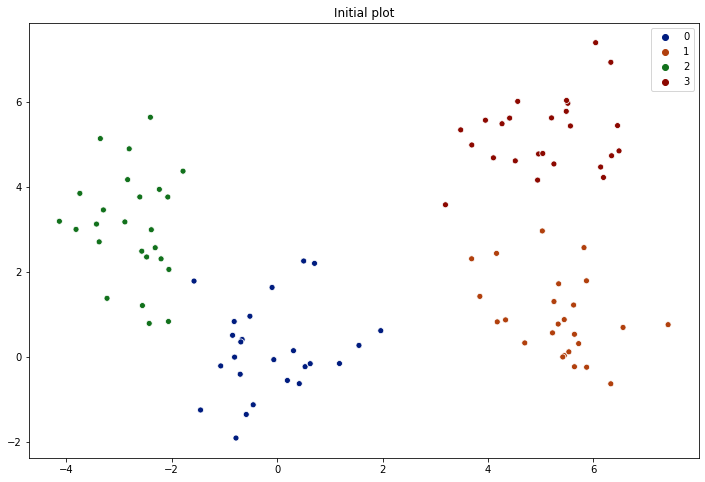

In [3]:
plt.figure(figsize=(12,8))
plt.title('Initial plot')
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='dark')

Lets apply AgglomerativeClustering to the dataset

In [4]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(distance_threshold=0, 
                            n_clusters=None,
                            affinity='euclidean',
                            linkage='complete')
ac = ac.fit(X)

Plot the **dendrogram**.

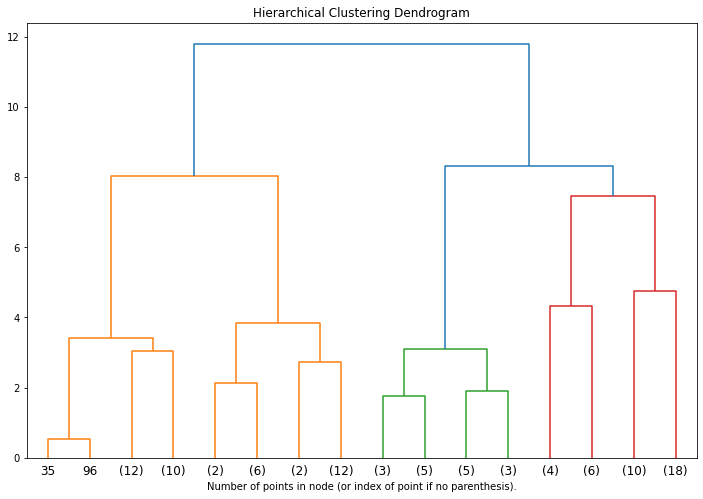

In [5]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.figure(figsize=(12,8))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(ac, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                            affinity='euclidean',
                            linkage='complete')
ac = ac.fit(X)

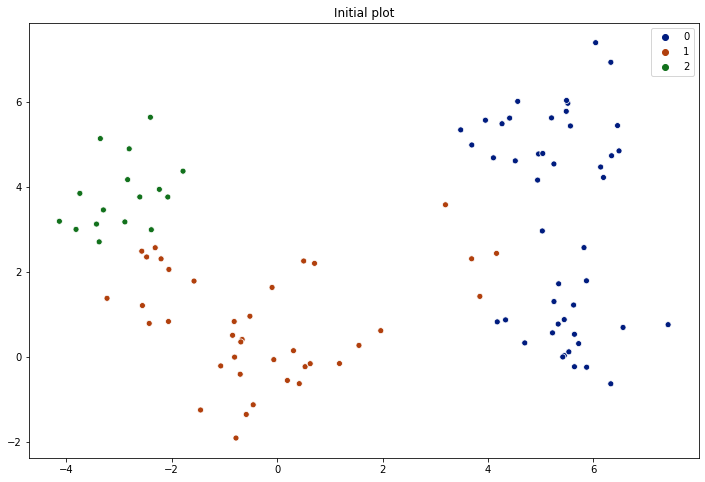

In [7]:
plt.figure(figsize=(12,8))
plt.title('Initial plot')
sns.scatterplot(X[:,0], X[:,1], hue=ac.labels_, palette='dark')

We can see from above that Hierarchical clustering gives a pretty good split of the dataset.

Let see what happens when we change the linkage to single.

In [10]:
ac = AgglomerativeClustering(distance_threshold=0, 
                            n_clusters=None,
                            affinity='euclidean',
                            linkage='single')
ac = ac.fit(X)

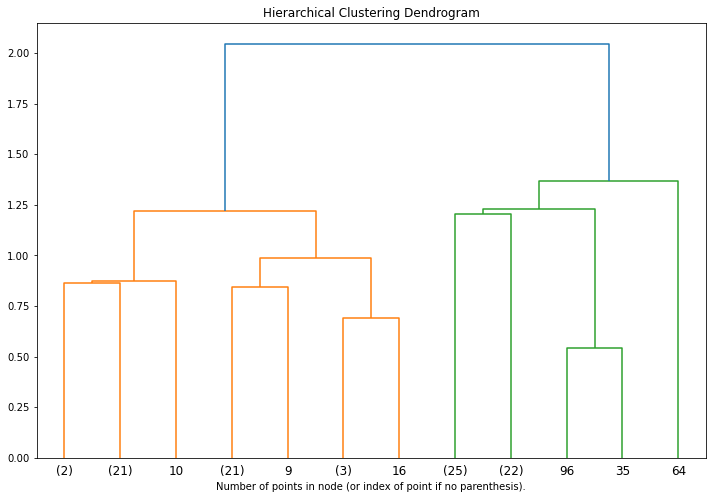

In [11]:
plt.figure(figsize=(12,8))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(ac, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

With linkage as **single** we tend to get stringy long clusters.

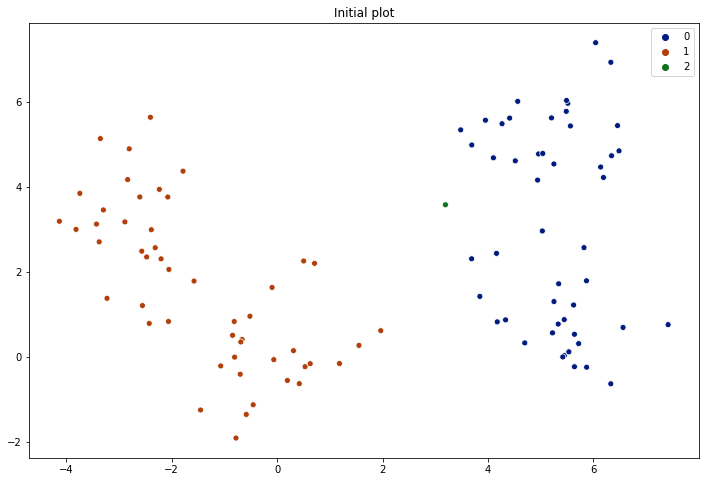

In [12]:
ac = AgglomerativeClustering(n_clusters=3,
                            affinity='euclidean',
                            linkage='single')
ac = ac.fit(X)
plt.figure(figsize=(12,8))
plt.title('Initial plot')
sns.scatterplot(X[:,0], X[:,1], hue=ac.labels_, palette='dark')

With **single** linkage we only get two clusters. Third cluster is empty!!